<a href="https://colab.research.google.com/github/pavankumarallu/K_ML/blob/main/NumberDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tdfs

In [2]:
(train_data,test_data),info_data = tdfs.load('mnist',split=['train','test'],shuffle_files=True,as_supervised=True,with_info=True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
def normalize(image,label):
  return tf.cast(image,tf.float32)/255. , label

In [4]:
train_data = train_data.map(normalize,num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_data = train_data.cache().shuffle(info_data.splits['train'].num_examples).batch(126).prefetch(tf.data.experimental.AUTOTUNE)

In [5]:
test_data = test_data.map(normalize,num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_data = test_data.cache().shuffle(info_data.splits['test'].num_examples).batch(126).prefetch(tf.data.experimental.AUTOTUNE)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


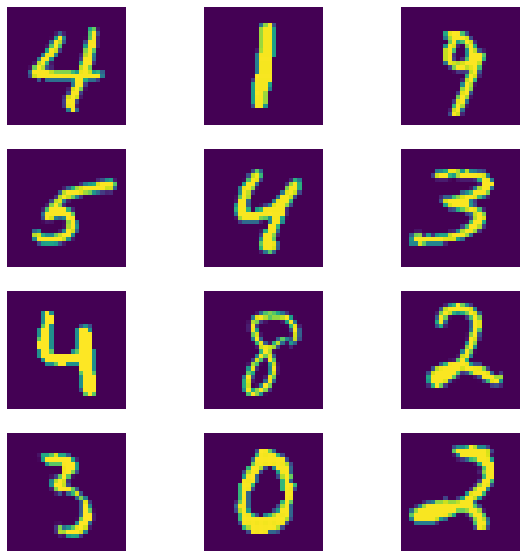

In [6]:

plt.figure(figsize=(10,10))
for images, labels in train_data.take(2):
  for i in range(12):
    plt.subplot(4,3,i+1)
    image = np.squeeze(images[i])
    plt.imshow(image)
    plt.axis('off')

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28,1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')                             
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

In [19]:
history = model.fit(train_data,validation_data=test_data,epochs = 7)

Epoch 1/7
477/477 [==============================] - 2s 3ms/step - loss: 0.0430 - accuracy: 0.9880 - val_loss: 0.0778 - val_accuracy: 0.9773
Epoch 2/7
477/477 [==============================] - 2s 3ms/step - loss: 0.0355 - accuracy: 0.9901 - val_loss: 0.0825 - val_accuracy: 0.9743
Epoch 3/7
477/477 [==============================] - 2s 3ms/step - loss: 0.0310 - accuracy: 0.9915 - val_loss: 0.0728 - val_accuracy: 0.9778
Epoch 4/7
477/477 [==============================] - 2s 3ms/step - loss: 0.0264 - accuracy: 0.9931 - val_loss: 0.0727 - val_accuracy: 0.9781
Epoch 5/7
477/477 [==============================] - 2s 3ms/step - loss: 0.0220 - accuracy: 0.9941 - val_loss: 0.0777 - val_accuracy: 0.9779
Epoch 6/7
477/477 [==============================] - 2s 3ms/step - loss: 0.0181 - accuracy: 0.9958 - val_loss: 0.0747 - val_accuracy: 0.9785
Epoch 7/7
477/477 [==============================] - 2s 3ms/step - loss: 0.0163 - accuracy: 0.9960 - val_loss: 0.0807 - val_accuracy: 0.9761


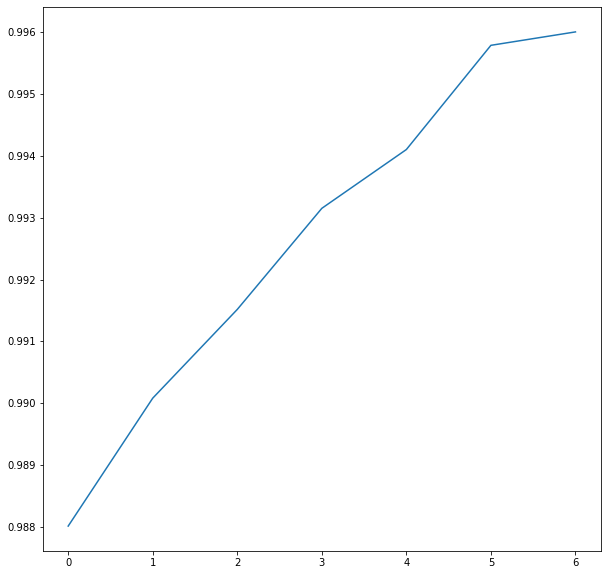

In [20]:
plt.figure(figsize=(10,10))
plt.plot(range(7),history.history['accuracy'])

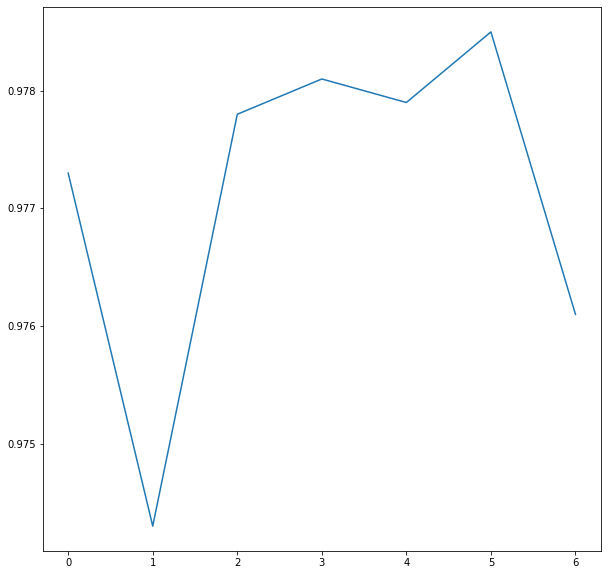

In [21]:
plt.figure(figsize=(10,10))
plt.plot(range(7),history.history['val_accuracy'])

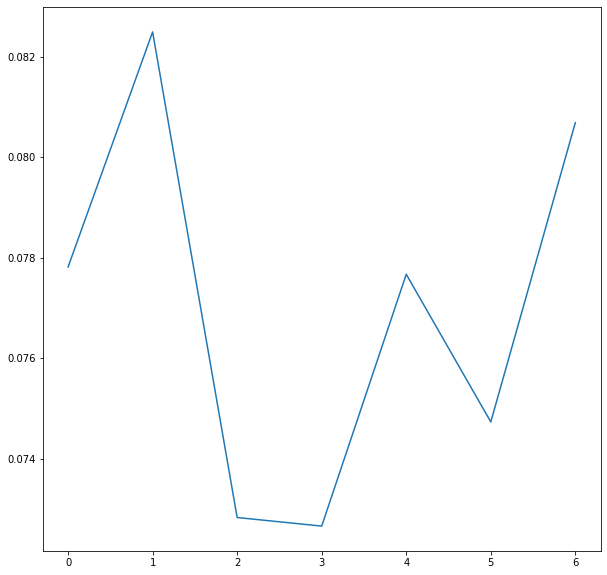

In [22]:
plt.figure(figsize=(10,10))
plt.plot(range(7),history.history['val_loss'])

In [51]:
model.evaluate(test_data)

80/80 [==============================] - 0s 3ms/step - loss: 0.0807 - accuracy: 0.9761


[0.08069141954183578, 0.9761000275611877]

In [52]:
pred = model.predict(test_data)

In [53]:
pred = list(map(lambda x: np.argmax(x),pred))

In [ ]:
pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


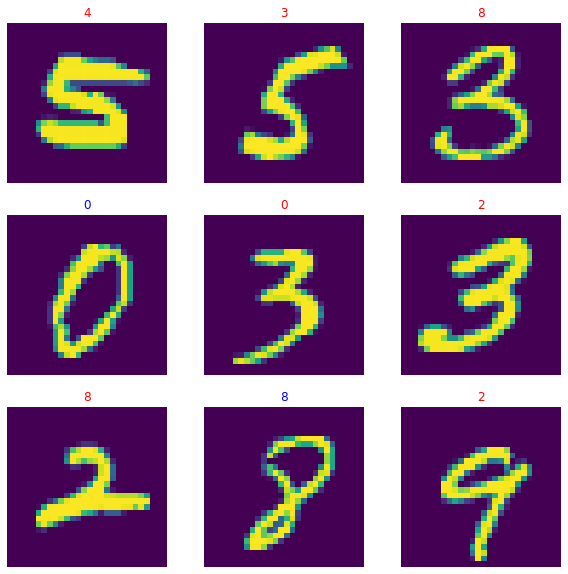